In [1]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import csv
from datetime import datetime
import re

In [2]:
label_modularity = "NewClass"
model = "All"
validation_size = 0.1

In [3]:
def select_model(model):
    models = []
    
    if model == "NB" or model == "All":
        models.append({
            "m": MultinomialNB(),
            "name": "Naive Bayes"
        })
    if model == "SVM" or model == "All":
        models.append({
            "m": SVC(kernel="linear", random_state=42),
            "name": "SVM"
        })
    if model == "RF" or model == "All":
        models.append({
            "m": RandomForestClassifier(n_estimators=100, random_state=42),
            "name": "Random Forest"
        })
    if model == "KNN" or model == "All":
        models.append({
            "m": KNeighborsClassifier(n_neighbors=5),
            "name": "KNN"
        })
    if model == "LR" or model == "All":
        models.append({
            "m": LogisticRegression(),
            "name": "LR"
        })

    if len(models) == 0:
        models.append({
            "m": MultinomialNB(),
            "name": "Naive Bayes"
        })
        
    return models

In [4]:
filename = 'FinalDataset/polished_dataset_94_20000_limited_texts_down_2000.csv'
name_to_save = "20000 texts down 2000"

data = pd.read_csv(filename)

train_data, validation_data = train_test_split(data, test_size=validation_size, random_state=42)

In [5]:
#GET NUMBER OF LABELS
original_labels = train_data[label_modularity].unique().tolist()
num_labels = train_data[label_modularity].nunique()
print(num_labels)

48


In [6]:
# Get total number of texts
num_texts = train_data.shape[0]
print(num_texts)

355911


In [7]:
#Get total number of words
all_text = ' '.join(train_data['Text'].values)
num_words = len(all_text.split())
print(num_words)

28981037


In [8]:
#Calculate Z
z = num_texts / (num_words/num_texts)
print(z)

4370.880169712354


In [9]:
#Count token time
token_start = time.time()

In [10]:
label_encoder = LabelEncoder()
train_data[label_modularity] = label_encoder.fit_transform(train_data[label_modularity])
labels = train_data[label_modularity].tolist()

validation_data[label_modularity] = label_encoder.fit_transform(validation_data[label_modularity])
val_labels = validation_data[label_modularity].tolist()

In [11]:
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english', lowercase=True)
train_features = vectorizer.fit_transform(train_data['Text'])
validation_features = vectorizer.transform(validation_data['Text'])

In [12]:
token_finish = time.time()

print(token_finish - token_start)

21.73493981361389


In [13]:
# Select any model
classifiers = select_model(model)

for c in classifiers:
    train_start = time.time()
    c["m"].fit(train_features, labels)
    train_finish = time.time()
    print("Train Time "+c["name"]+": "+ str(train_finish - train_start))

    val_start = time.time()
    
    val_predictions = c["m"].predict(validation_features)
    accuracy = accuracy_score(val_labels, val_predictions)
    precision = precision_score(val_labels, val_predictions, average='weighted')
    recall = recall_score(val_labels, val_predictions, average='weighted')
    f1 = f1_score(val_labels, val_predictions, average='weighted')
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")

    val_finish = time.time()
    print("Validation Time "+c["name"]+": "+ str(val_finish - val_start))

    #Save results
    csv_file = "Results/ModelResults.csv"
    current_date = datetime.now().strftime('%Y-%m-%d')
    column_names = ["Model Name", "Num Classes", "Total Texts", "Total Words", "Accuracy", "Precision", "F1 Score", "Recall", "Train Time", "Validation Time", "Date"]


    with open(csv_file, mode='a', newline='') as file:
        writer = csv.writer(file)

        # Escribir los nombres de las columnas en la primera fila
        if file.tell() == 0:  # Verificar si el archivo está vacío
            writer.writerow(column_names)
        
        # Escribir los valores en una nueva fila
        writer.writerow([c["name"], num_labels, num_texts, num_words, accuracy, precision, f1, recall, train_finish - train_start, val_finish - val_start, current_date, name_to_save])

Train Time Naive Bayes: 0.3699071407318115
Accuracy: 0.8195
Precision: 0.8301
Recall: 0.8195
F1-score: 0.8141
Validation Time Naive Bayes: 0.13605308532714844
Train Time SVM: 2666.6501998901367
Accuracy: 0.8840
Precision: 0.8850
Recall: 0.8840
F1-score: 0.8840
Validation Time SVM: 1222.3412618637085
Train Time Random Forest: 2173.206949710846
Accuracy: 0.8589
Precision: 0.8585
Recall: 0.8589
F1-score: 0.8567
Validation Time Random Forest: 3.0513713359832764
Train Time KNN: 0.10281920433044434
Accuracy: 0.7600
Precision: 0.8353
Recall: 0.7600
F1-score: 0.7854
Validation Time KNN: 263.6284456253052


/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train Time LR: 87.14425706863403
Accuracy: 0.8795
Precision: 0.8798
Recall: 0.8795
F1-score: 0.8791
Validation Time LR: 0.21069836616516113


In [14]:
conf_matrix = confusion_matrix(val_labels, val_predictions)

In [15]:
class_accuracy = {}
for i in range(len(label_encoder.classes_)):
    class_name = label_encoder.classes_[i]
    total = conf_matrix[i].sum()
    correct = conf_matrix[i][i]
    accuracy = correct / total if total > 0 else 0.0
    class_accuracy[class_name] = accuracy

In [16]:
# Imprimir el accuracy por clase
sorted_class_accuracy = sorted(class_accuracy.items(), key=lambda x: x[1], reverse=True)

print("Accuracy por clase:")
for class_name, acc in sorted_class_accuracy:
    print(f"{class_name}: {acc}")

# Calcular el accuracy general
accuracy = accuracy_score(val_labels, val_predictions)
print("Accuracy general:", accuracy)

Accuracy por clase:
OlympicResult: 0.9902912621359223
SportsTeam: 0.9857456140350878
CelestialBody: 0.9838709677419355
SportsEvent: 0.9823943661971831
Film: 0.977364185110664
TelevisionEpisode: 0.9716981132075472
VideoGame: 0.9706390328151986
Region: 0.9666834931852599
TelevisionShow: 0.9625
Album: 0.9610914603335018
Infrastructure: 0.9538773441459706
Athlete: 0.9455370650529501
Species: 0.9377104377104377
Plant: 0.9349553128103277
Disease: 0.9330855018587361
MilitaryConflict: 0.9309021113243762
Animal: 0.9307616221562809
Play: 0.9279279279279279
PoliticalParty: 0.9256965944272446
BodyOfWater: 0.9233817701453104
Island: 0.9099099099099099
Building: 0.9073529411764706
EducationalInstitution: 0.906060606060606
Single: 0.8996108949416343
Book: 0.8993399339933993
Broadcaster: 0.8961538461538462
SportFacility: 0.8913385826771654
PeriodicalLiterature: 0.8810020876826722
FictionalCharacter: 0.8732394366197183
Noble: 0.8652373660030628
Politician: 0.8634097706879362
Painting: 0.858536585365853

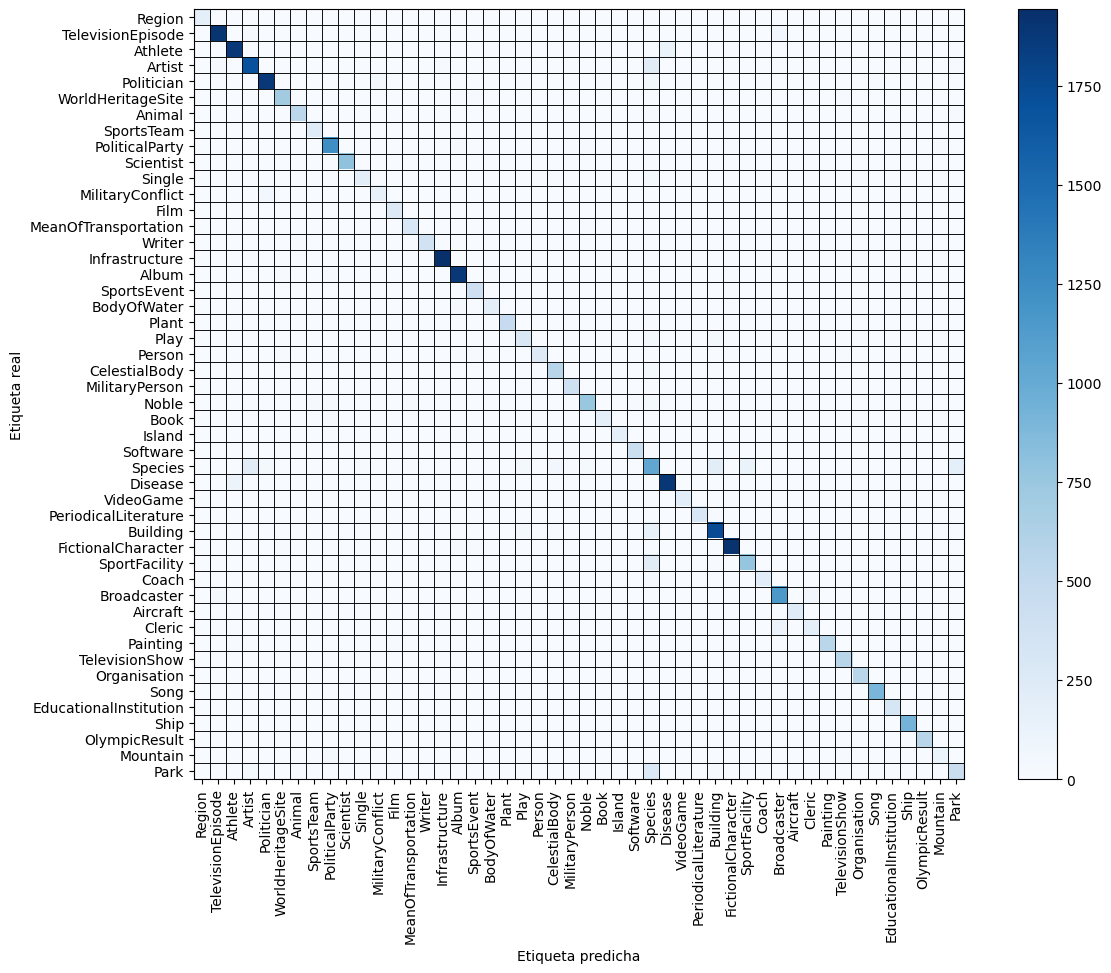

In [17]:
normalize=False
cmap=plt.cm.Blues

plt.figure(figsize=(14, 10))
plt.title("")

plt.imshow(conf_matrix, interpolation='nearest', cmap=cmap)
plt.colorbar()
tick_marks = np.arange(num_labels)
plt.xticks(tick_marks, original_labels, rotation=90)
plt.yticks(tick_marks, original_labels)

for i in range(num_labels):
        for j in range(num_labels):
            plt.gca().add_patch(plt.Rectangle((j - 0.5, i - 0.5), 1, 1, color='black', fill=None, linewidth=0.5))

plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta real')
plt.show()